In [0]:
import os
import zipfile
import random
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/currency_dataset.zip"\
    -O "/tmp/currency_dataset.zip"

local_zip = '/tmp/currency_dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2019-11-10 19:05:17--  https://storage.googleapis.com/datsets/currency_dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1216882211 (1.1G) [application/x-zip-compressed]
Saving to: ‘/tmp/currency_dataset.zip’

/tmp/currency_datas 100%[===================>]   1.13G  27.4MB/s    in 36s     

2019-11-10 19:05:58 (32.2 MB/s) - ‘/tmp/currency_dataset.zip’ saved [1216882211/1216882211]



In [0]:
print(len(os.listdir('/tmp/dataset/ten/')))
print(len(os.listdir('/tmp/dataset/twenty/')))
print(len(os.listdir('/tmp/dataset/fifty/')))
print(len(os.listdir('/tmp/dataset/hundred/')))
print(len(os.listdir('/tmp/dataset/fivehundred/')))
print(len(os.listdir('/tmp/dataset/thousand/')))

435
437
447
413
402
437


In [0]:
try:
    os.mkdir('/tmp/currencydataset/')
    os.mkdir('/tmp/currencydataset/training/')
    os.mkdir('/tmp/currencydataset/testing/')
    os.mkdir('/tmp/currencydataset/training/ten/')
    os.mkdir('/tmp/currencydataset/testing/ten/')
    os.mkdir('/tmp/currencydataset/training/twenty/')
    os.mkdir('/tmp/currencydataset/testing/twenty/')
    os.mkdir('/tmp/currencydataset/training/fifty/')
    os.mkdir('/tmp/currencydataset/testing/fifty/')
    os.mkdir('/tmp/currencydataset/training/hundred/')
    os.mkdir('/tmp/currencydataset/testing/hundred/')
    os.mkdir('/tmp/currencydataset/training/fivehundred/')
    os.mkdir('/tmp/currencydataset/testing/fivehundred/')
    os.mkdir('/tmp/currencydataset/training/thousand/')
    os.mkdir('/tmp/currencydataset/testing/thousand/')
except OSError:
    pass

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE +"/"+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE +"/"+ filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE +"/"+ filename
        destination = TESTING + filename
        copyfile(this_file, destination)


TEN_SOURCE_DIR = "/tmp/dataset/ten/"
TRAINING_TEN_DIR = "/tmp/currencydataset/training/ten/"
TESTING_TEN_DIR = "/tmp/currencydataset/testing/ten/"
TWENTY_SOURCE_DIR = "/tmp/dataset/twenty/"
TRAINING_TWENTY_DIR = "/tmp/currencydataset/training/twenty/"
TESTING_TWENTY_DIR = "/tmp/currencydataset/testing/twenty/"
FIFTY_SOURCE_DIR = "/tmp/dataset/fifty/"
TRAINING_FIFTY_DIR = "/tmp/currencydataset/training/fifty/"
TESTING_FIFTY_DIR = "/tmp/currencydataset/testing/fifty/"
HUNDRED_SOURCE_DIR = "/tmp/dataset/hundred/"
TRAINING_HUNDRED_DIR = "/tmp/currencydataset/training/hundred/"
TESTING_HUNDRED_DIR = "/tmp/currencydataset/testing/hundred/"
FIVEHUNDRED_SOURCE_DIR = "/tmp/dataset/fivehundred/"
TRAINING_FIVEHUNDRED_DIR = "/tmp/currencydataset/training/fivehundred/"
TESTING_FIVEHUNDRED_DIR = "/tmp/currencydataset/testing/fivehundred/"
THOUSAND_SOURCE_DIR = "/tmp/dataset/thousand/"
TRAINING_THOUSAND_DIR = "/tmp/currencydataset/training/thousand/"
TESTING_THOUSAND_DIR = "/tmp/currencydataset/testing/thousand/"

split_size = .9
split_data(TEN_SOURCE_DIR, TRAINING_TEN_DIR, TESTING_TEN_DIR, split_size)
split_data(TWENTY_SOURCE_DIR, TRAINING_TWENTY_DIR, TESTING_TWENTY_DIR, split_size)
split_data(FIFTY_SOURCE_DIR, TRAINING_FIFTY_DIR, TESTING_FIFTY_DIR, split_size)
split_data(HUNDRED_SOURCE_DIR, TRAINING_HUNDRED_DIR, TESTING_HUNDRED_DIR, split_size)
split_data(FIVEHUNDRED_SOURCE_DIR, TRAINING_FIVEHUNDRED_DIR, TESTING_FIVEHUNDRED_DIR, split_size)
split_data(THOUSAND_SOURCE_DIR, TRAINING_THOUSAND_DIR, TESTING_THOUSAND_DIR, split_size)


In [0]:
print(len(os.listdir("/tmp/currencydataset/training/ten/")))
print(len(os.listdir("/tmp/currencydataset/testing/ten/")))
print(len(os.listdir("/tmp/currencydataset/training/twenty/")))
print(len(os.listdir("/tmp/currencydataset/testing/twenty/")))
print(len(os.listdir("/tmp/currencydataset/training/fifty/")))
print(len(os.listdir("/tmp/currencydataset/testing/fifty/")))
print(len(os.listdir("/tmp/currencydataset/training/hundred/")))
print(len(os.listdir("/tmp/currencydataset/testing/hundred/")))
print(len(os.listdir("/tmp/currencydataset/training/fivehundred/")))
print(len(os.listdir("/tmp/currencydataset/testing/fivehundred/")))
print(len(os.listdir("/tmp/currencydataset/training/thousand/")))
print(len(os.listdir("/tmp/currencydataset/testing/thousand/")))


391
44
393
44
402
45
371
42
361
41
393
44


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
TRAINING_DIR = "/tmp/currencydataset/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=40,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/currencydataset/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=40,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 2311 images belonging to 6 classes.
Found 260 images belonging to 6 classes.


In [0]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/10
58/58 [==============================] - 136s 2s/step - loss: 1.7761 - acc: 0.2099 - val_loss: 1.7322 - val_acc: 0.2885
Epoch 2/10
58/58 [==============================] - 127s 2s/step - loss: 1.5468 - acc: 0.3531 - val_loss: 1.3808 - val_acc: 0.4538
Epoch 3/10
58/58 [==============================] - 128s 2s/step - loss: 1.1966 - acc: 0.5045 - val_loss: 0.9031 - val_acc: 0.6769
Epoch 4/10
58/58 [==============================] - 128s 2s/step - loss: 0.9738 - acc: 0.6253 - val_loss: 0.6664 - val_acc: 0.7500
Epoch 5/10
58/58 [==============================] - 128s 2s/step - loss: 0.6424 - acc: 0.7555 - val_loss: 0.4935 - val_acc: 0.8115
Epoch 6/10
58/58 [==============================] - 128s 2s/step - loss: 0.4136 - acc: 0.8555 - val_loss: 0.2835 - val_acc: 0.9115
Epoch 7/10
58/58 [==============================] - 128s 2s/step - loss: 0.2465 - acc: 0.9165 - val_loss: 0.0999 - val_acc: 0.9731
Epoch 8/10
58/58 [==============================] - 127s 2s/step - loss: 0.1648 - a

Epoch 1/10
57/58 [============================>.] - ETA: 2s - loss: 1.6815 - acc: 0.2809Epoch 1/10

58/58 [==============================] - 132s 2s/step - loss: 1.6765 - acc: 0.2847 - val_loss: 1.5284 - val_acc: 0.3731

Epoch 2/10
57/58 [============================>.] - ETA: 1s - loss: 1.3506 - acc: 0.4522Epoch 1/10

58/58 [==============================] - 125s 2s/step - loss: 1.3487 - acc: 0.4539 - val_loss: 1.0903 - val_acc: 0.5654

Epoch 3/10
57/58 [============================>.] - ETA: 1s - loss: 1.0483 - acc: 0.5949Epoch 1/10

58/58 [==============================] - 123s 2s/step - loss: 1.0476 - acc: 0.5958 - val_loss: 0.8745 - val_acc: 0.6538

Epoch 4/10
57/58 [============================>.] - ETA: 1s - loss: 0.8353 - acc: 0.6865Epoch 1/10

58/58 [==============================] - 124s 2s/step - loss: 0.8336 - acc: 0.6876 - val_loss: 0.6505 - val_acc: 0.7731
Epoch 5/10
57/58 [============================>.] - ETA: 1s - loss: 0.5799 - acc: 0.7970Epoch 1/10
58/58 [==============================] - 124s 2s/step - loss: 0.5807 - acc: 0.7958 - val_loss: 0.4841 - val_acc: 0.8385

Epoch 6/10
57/58 [============================>.] - ETA: 1s - loss: 0.3763 - acc: 0.8648Epoch 1/10

58/58 [==============================] - 124s 2s/step - loss: 0.3759 - acc: 0.8650 - val_loss: 0.2524 - val_acc: 0.9231

Epoch 7/10
57/58 [============================>.] - ETA: 1s - loss: 0.2433 - acc: 0.9221Epoch 1/10

58/58 [==============================] - 124s 2s/step - loss: 0.2420 - acc: 0.9225 - val_loss: 0.1825 - val_acc: 0.9538

Epoch 8/10
57/58 [============================>.] - ETA: 1s - loss: 0.2144 - acc: 0.9265Epoch 1/10

58/58 [==============================] - 124s 2s/step - loss: 0.2128 - acc: 0.9269 - val_loss: 0.1206 - val_acc: 0.9692

Epoch 9/10
57/58 [============================>.] - ETA: 1s - loss: 0.0968 - acc: 0.9749Epoch 1/10

58/58 [==============================] - 124s 2s/step - loss: 0.0965 - acc: 0.9749 - val_loss: 0.0502 - val_acc: 0.9962

Epoch 10/10
57/58 [============================>.] - ETA: 1s - loss: 0.0515 - acc: 0.9877Epoch 1/10

58/58 [==============================] - 125s 2s/step - loss: 0.0516 - acc: 0.9879 - val_loss: 0.0606 - val_acc: 0.9923

<Figure size 432x288 with 0 Axes>

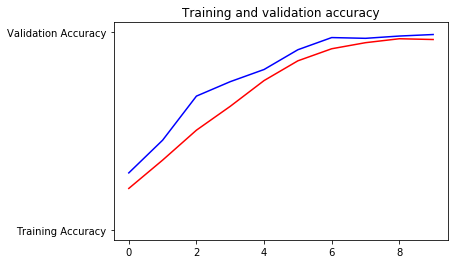

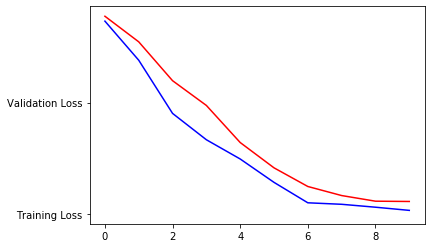

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
model.save('curruncyrecognition2.h5')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

---
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param 
   
=================================================================

conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_______________________________________________________________


 max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               9470464   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078     
=================================================================
Total params: 9,497,126
Trainable params: 9,497,126
Non-trainable params: 0
---




In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
3.jpg
[[0. 1. 0. 0. 0. 0.]]
4.jpg
[[0. 1. 0. 0. 0. 0.]]
5.jpg
[[0. 1. 0. 0. 0. 0.]]
6.jpg
[[0. 0. 0. 1. 0. 0.]]
